# Dataframe running SQL query

## Relational data with flexible, powerful analytics

Relational data stores are easy to build and query. Users and developers often prefer writing easy-to-interpret, declarative queries in a human-like readable language such as SQL. However, as data starts increasing in volume and variety, the relational approach does not scale well enough for building Big Data applications and analytical systems. Following are some major challenges.

1. Dealing with different types and sources of data, which can be structured, semi-structured and unstructured
2. Building ETL pipeline to and from various data sources, which may lead to developing a lot of specific custom code, thereby increasing technical debt over time
3. Having the capability to perform both traditional business intelligence(BI) - based analytics and advanced analytics (machine learning, statsical modeling, etc), the latter of which is definitely challenging to perform in relational systems

We have had success in the domain of Big Data analytics with Hadoop and the MapReduce paradigm. This was powerful, but often slow and gave users a low-level procedural programming interface that required people to write a lot of code for even very simple data transformations. However, one Spark was released, it really revolutionized the way Big Data analytics was done with a focus on in-memory computing, fault tolerance, high-level abstractions, and ease of use.

From then, several frameworks and systems like Hive, Pig and Shark (which evolved into Spark SQL) provided rich relational interfaces and delcarative quierying mechanisms to Big Data stores. The challenge remained that these tools were either relational or procedural-based and we could not have the best of both worlds.

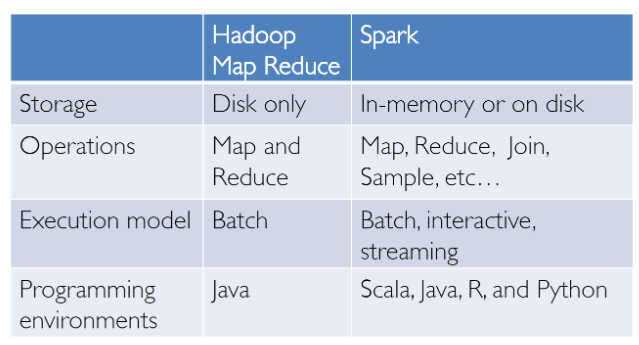

However, in the real world, most data and analytical pipelines might involve a combination of relational and procedural code. Forcing users to choose either one ends up complicating thing and increasing user effects in developing, building, and maintaining different applications and systems. Apache Spark SQL builds on the previously mentioned SQL-on-Spark effect called Shark. Instead of forcing user to pick between a relational or a procedural API, Spark SQL tries to enable users to seamlessly intermix the two and perform data querying, retrieval, and analysis at scale on Big Data.

### Spark SQL

Spark SQL essentially tries to bridge the gap between the two models we mentioned previously -- the relational and procedural models.

Spark SQL provides a DataFrame API that can perform relational operations on both external data sources and Spark's built in distributed collections -- at scale!

To support a wide variety of diverse data sources and algorithms in Big Data, Spark SQL introduces a novel extensible optimizer called Catalyst, which makes it easy to add data sources, optimization rules and data types for adavanced analytics such as machine learning. Essentially, Spark SQL leverages the power of Spark to perform distributed, robust, in-memory computation at massive scale on Big Data.

Spark SQL provides state-of-the-art SQL performance and also maintains compatibility with all existing structures and components supported by Apache Hive (a popular Big Data warehouse framework) including data formats, user-defined functions (UDFs), and the metastore. Besides this, it also helps in ingesting a wide variety of data formats from Big Data sources and enterprise data warehouses like JSON, Hive, Parquet, and so on, and performing a combination of relational and procedural operations for more complex, advanced analytics.

Catalyst supports both rule-based and cost-based optimization. While extensible optimizers have been proposed in the past, they have typically required a complex domain-specific language to specify rules. Usually, this leads to having a significant learning curve and maintenance burden. In contrast, Catalyst uses standard features of the Scala programming language, such as pattern-matching, to let developers use the full programming language while still making rules easy to specify.

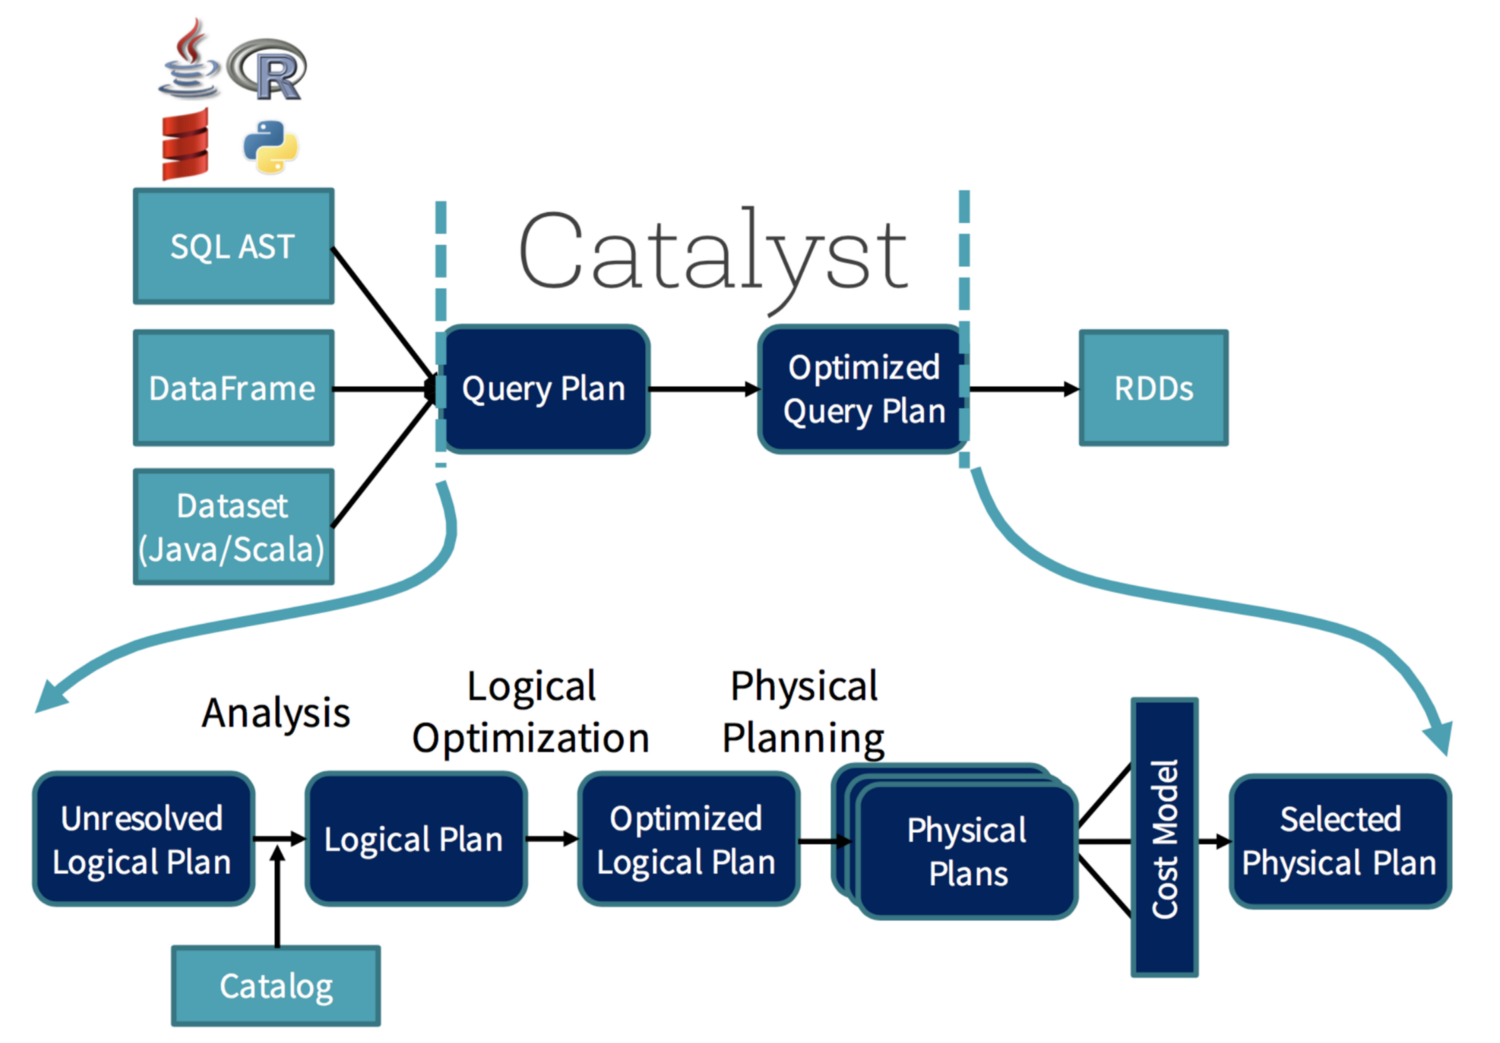

## Useful references for this Notebook

PySpark in Jupyter Notebook — Working with Dataframe & JDBC Data Sources - https://medium.com/@thucnc/pyspark-in-jupyter-notebook-working-with-dataframe-jdbc-data-sources-6f3d39300bf6

PySpark - Working with JDBC Sqlite database - http://mitzen.blogspot.com/2017/06/pyspark-working-with-jdbc-sqlite.html

In [1]:
from pyspark import SparkContext as sc
from pyspark.sql import SparkSession

In [2]:
spark1 = SparkSession.builder.appName('SQL').getOrCreate()

In [3]:
df = spark1.read.csv('file:///home/erin/Downloads/spark-3.0.1-bin-hadoop2.7/SparkFolder/spark/Data/appl_stock.csv', inferSchema=True, header=True)

In [4]:
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



### Create a temporary view

In [5]:
df.createOrReplaceTempView('stock')

### Now run a simple SQL query directly on this view, It returns a DataFrame.

In [6]:
result = spark1.sql('SELECT * FROM stock LIMIT 5')

In [7]:
result

DataFrame[Date: string, Open: double, High: double, Low: double, Close: double, Volume: int, Adj Close: double]

In [8]:
result.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [9]:
result.show()

+----------+----------+----------+------------------+------------------+---------+------------------+
|      Date|      Open|      High|               Low|             Close|   Volume|         Adj Close|
+----------+----------+----------+------------------+------------------+---------+------------------+
|2010-01-04|213.429998|214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|214.599998|215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|214.379993|    215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|    211.75|212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|210.299994|212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
+----------+----------+----------+------------------+------------------+---------+------------------+



### Run slightly more complex queries

How many entries in the Close field are higher than 500?

In [10]:
count_greater_500 = spark1.sql("SELECT COUNT(Close) FROM stock WHERE Close > 500").show()

+------------+
|count(Close)|
+------------+
|         403|
+------------+



### Read a file (and create dataframe) by direct running a spark.sql method on the file

Notice the syntax of csv.<path->filename.csv> inside the SQL query

In [11]:
df_sales = spark1.sql('SELECT * FROM csv.`file:///home/erin/Downloads/spark-3.0.1-bin-hadoop2.7/SparkFolder/spark/Data/sales_info.csv`')

In [12]:
df_sales.show()

+-------+-------+-----+
|    _c0|    _c1|  _c2|
+-------+-------+-----+
|Company| Person|Sales|
|   GOOG|    Sam|  200|
|   GOOG|Charlie|  120|
|   GOOG|  Frank|  340|
|   MSFT|   Tina|  600|
|   MSFT|    Amy|  124|
|   MSFT|Vanessa|  243|
|     FB|   Carl|  870|
|     FB|  Sarah|  350|
|   APPL|   John|  250|
|   APPL|  Linda|  130|
|   APPL|   Mike|  750|
|   APPL|  Chris|  350|
+-------+-------+-----+



### Read tables from a local SQLite database file using JDBC connection

For this read, we will use the famous chinook DB in SQLite tutorial. We can download file from https://www.sqlitetutorial.net/sqlite-sample-database/ .


First cd to the directory where all the PySpark jar files are kept. Then download the SQLite jar from the https://mvnrepository.com/artifact/org.xerial/sqlite-jdbc

In [31]:
!cd /home/erin/Downloads/spark-3.0.1-bin-hadoop2.7/jars/
!curl https://repo1.maven.org/maven2/org/xerial/sqlite-jdbc/3.32.3.1/sqlite-jdbc-3.32.3.1.jar

[sudo] password for erin: 
[sudo] password for erin: 

### Define driver, path to local  .db file, and append that path to jdbc:sqlite to construct the url

In [13]:
driver = "org.sqlite.JDBC"
path='file:///home/erin/Downloads/spark-3.0.1-bin-hadoop2.7/SparkFolder/spark/Data/chinook.db'
url = "jdbc:sqlite:" + path

### Define tablename to be read

In [14]:
tablename = "albums"

In [15]:

df_albums = spark1.read.format("jdbc").option("url", url).option("dbtable", tablename).option("driver", driver).load()

In [16]:
df_albums.show()

+-------+--------------------+--------+
|AlbumId|               Title|ArtistId|
+-------+--------------------+--------+
|      1|For Those About T...|       1|
|      2|   Balls to the Wall|       2|
|      3|   Restless and Wild|       2|
|      4|   Let There Be Rock|       1|
|      5|            Big Ones|       3|
|      6|  Jagged Little Pill|       4|
|      7|            Facelift|       5|
|      8|      Warner 25 Anos|       6|
|      9|Plays Metallica B...|       7|
|     10|          Audioslave|       8|
|     11|        Out Of Exile|       8|
|     12| BackBeat Soundtrack|       9|
|     13|The Best Of Billy...|      10|
|     14|Alcohol Fueled Br...|      11|
|     15|Alcohol Fueled Br...|      11|
|     16|       Black Sabbath|      12|
|     17|Black Sabbath Vol...|      12|
|     18|          Body Count|      13|
|     19|    Chemical Wedding|      14|
|     20|The Best Of Buddy...|      15|
+-------+--------------------+--------+
only showing top 20 rows



In [17]:
df_albums.printSchema()

root
 |-- AlbumId: integer (nullable = true)
 |-- Title: string (nullable = true)
 |-- ArtistId: integer (nullable = true)



### Don't forget to create temp view to use later

In [18]:
df_albums.createTempView('albums')

### Read another table-artists

In [19]:
tablename = "artists"

In [20]:
df_artists = spark1.read.format("jdbc").option("url", url).option("dbtable",tablename).option("driver",driver).load()

In [21]:
df_artists.show()

+--------+--------------------+
|ArtistId|                Name|
+--------+--------------------+
|       1|               AC/DC|
|       2|              Accept|
|       3|           Aerosmith|
|       4|   Alanis Morissette|
|       5|     Alice In Chains|
|       6|Antônio Carlos Jobim|
|       7|        Apocalyptica|
|       8|          Audioslave|
|       9|            BackBeat|
|      10|        Billy Cobham|
|      11| Black Label Society|
|      12|       Black Sabbath|
|      13|          Body Count|
|      14|     Bruce Dickinson|
|      15|           Buddy Guy|
|      16|      Caetano Veloso|
|      17|       Chico Buarque|
|      18|Chico Science & N...|
|      19|        Cidade Negra|
|      20|        Cláudio Zoli|
+--------+--------------------+
only showing top 20 rows



In [22]:
df_artists.createTempView('artists')

### Test if SQL query is working fine

In [23]:
spark1.sql("SELECT * FROM artists WHERE length(Name) < 10 LIMIT 10").show()

+--------+---------+
|ArtistId|     Name|
+--------+---------+
|       1|    AC/DC|
|       2|   Accept|
|       3|Aerosmith|
|       9| BackBeat|
|      15|Buddy Guy|
|      26|  Azymuth|
|      36|  O Rappa|
|      37| Ed Motta|
|      46|Jorge Ben|
|      50|Metallica|
+--------+---------+



### Join the albums and artists tables in a single dataframe using SQL query (and order by ArtistId)

In [24]:
df_combined = spark1.sql("SELECT * FROM artists LEFT JOIN albums ON artists.ArtistId=albums.ArtistId order by artists.ArtistId")

In [25]:
df_combined.show()

+--------+--------------------+-------+--------------------+--------+
|ArtistId|                Name|AlbumId|               Title|ArtistId|
+--------+--------------------+-------+--------------------+--------+
|       1|               AC/DC|      1|For Those About T...|       1|
|       1|               AC/DC|      4|   Let There Be Rock|       1|
|       2|              Accept|      2|   Balls to the Wall|       2|
|       2|              Accept|      3|   Restless and Wild|       2|
|       3|           Aerosmith|      5|            Big Ones|       3|
|       4|   Alanis Morissette|      6|  Jagged Little Pill|       4|
|       5|     Alice In Chains|      7|            Facelift|       5|
|       6|Antônio Carlos Jobim|     34|Chill: Brazil (Di...|       6|
|       6|Antônio Carlos Jobim|      8|      Warner 25 Anos|       6|
|       7|        Apocalyptica|      9|Plays Metallica B...|       7|
|       8|          Audioslave|     10|          Audioslave|       8|
|       8|          

### What is the difference between temporary and global SQL views?

#### A temporaray views does not persist (shared) across multiple sessions

In [26]:
df_artists.createOrReplaceTempView("temp_artists")
df_temp = spark1.sql("SELECT * FROM temp_artists LIMIT 10")
df_temp.show()

+--------+--------------------+
|ArtistId|                Name|
+--------+--------------------+
|       1|               AC/DC|
|       2|              Accept|
|       3|           Aerosmith|
|       4|   Alanis Morissette|
|       5|     Alice In Chains|
|       6|Antônio Carlos Jobim|
|       7|        Apocalyptica|
|       8|          Audioslave|
|       9|            BackBeat|
|      10|        Billy Cobham|
+--------+--------------------+



### A new session is created bur the temp view temp_artists cannot be accesed

In [27]:
spark2 = SparkSession.builder.appName('SQL2').getOrCreate()

### We use try... except to catch the error and display a generic message

In [28]:
try:
    df_temp = spark2.sql("SELECT * FROM temp_artists LIMIT 10")
except:
    print("Error happened in this execution")

### Now, a global view is created in this  session

Global temporary view is tied to a system preserved database global_temp. So the view name must be referenced as such.

In [30]:
tablename = "artists"
df_artists = spark2.read.format("jdbc").option("url", url).option("dbtable", tablename).option("driver", driver).load()

In [31]:
df_artists.createOrReplaceGlobalTempView("global_artists")

df_global = spark2.sql("SELECT * FROM global_temp.global_artists LIMIT 10")
df_global.show()

+--------+--------------------+
|ArtistId|                Name|
+--------+--------------------+
|       1|               AC/DC|
|       2|              Accept|
|       3|           Aerosmith|
|       4|   Alanis Morissette|
|       5|     Alice In Chains|
|       6|Antônio Carlos Jobim|
|       7|        Apocalyptica|
|       8|          Audioslave|
|       9|            BackBeat|
|      10|        Billy Cobham|
+--------+--------------------+



### Start a new session. The view global_artists can be accessed across the sessions

In [32]:
spark3 = SparkSession.builder.appName('SQL3').getOrCreate()

In [33]:
df_global = spark3.sql("SELECT * FROM global_temp.global_artists LIMIT 10")
df_global.show()

+--------+--------------------+
|ArtistId|                Name|
+--------+--------------------+
|       1|               AC/DC|
|       2|              Accept|
|       3|           Aerosmith|
|       4|   Alanis Morissette|
|       5|     Alice In Chains|
|       6|Antônio Carlos Jobim|
|       7|        Apocalyptica|
|       8|          Audioslave|
|       9|            BackBeat|
|      10|        Billy Cobham|
+--------+--------------------+

